In [1]:
import os, glob, random, time, gc
from tqdm import tqdm
from typing import List, Tuple

import numpy as np
import h5py
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
PATH_OUTPUT = 'output/analysis_fp'
os.makedirs(PATH_OUTPUT, exist_ok=True)

In [3]:
ROOT_EXP = f'output/val_fp_cal/034/*'

PATHS_EXP = glob.glob(ROOT_EXP)
PATHS_EXP[:4]

['output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse',
 'output/val_fp_cal/034/v6v16v10_v15v17_th0.4_cloud-postTrue_no-cloudTrue_no-postFalse',
 'output/val_fp_cal/034/v14v16_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse',
 'output/val_fp_cal/034/v6_v15_th0.4_cloud-postTrue_no-cloudTrue_no-postFalse']

In [4]:
dfs = []

for i, PATH_EXP in tqdm(enumerate(PATHS_EXP)):
    print(i, PATH_EXP)
    
    for  j in range(5):
        try:
            PATH_CSV = glob.glob(f'{PATH_EXP}/metrics_034_*_Cal{j}_*.csv')[0]
            
            df = pd.read_csv(PATH_CSV)
            
            # meta data
            path_list = PATH_CSV.split('/')
            df['exp'] = path_list[3]
            
            df['model_change'] = path_list[3].split('_')[0]
            df['model_post'] = path_list[3].split('_')[1]
            
            df['cloud_post'] = eval(path_list[3].split('_')[3][10:])
            df['no-cloud'] = eval(path_list[3].split('_')[4][8:])
            df['no-post'] = eval(path_list[3].split('_')[5][7:])
            
            
            df[f'Calfornia'] = j
            dfs.append(df)
        except:
            print('error')
            print(j, PATH_CSV)
        
df = pd.concat(dfs, axis=0)
print(df.shape)
df.head(6)

7it [00:00, 60.31it/s]

0 output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
1 output/val_fp_cal/034/v6v16v10_v15v17_th0.4_cloud-postTrue_no-cloudTrue_no-postFalse
2 output/val_fp_cal/034/v14v16_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
3 output/val_fp_cal/034/v6_v15_th0.4_cloud-postTrue_no-cloudTrue_no-postFalse
4 output/val_fp_cal/034/v6_v15_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
5 output/val_fp_cal/034/v6v18v14v19_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postTrue
6 output/val_fp_cal/034/v6v1618v14_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
7 output/val_fp_cal/034/v16_v15_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
8 output/val_fp_cal/034/v19_v15_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
9 output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postTrue


17it [00:00, 40.86it/s]

10 output/val_fp_cal/034/v10_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
11 output/val_fp_cal/034/v14v16_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postTrue
12 output/val_fp_cal/034/v19_v15_th0.4_cloud-postTrue_no-cloudFalse_no-postTrue
13 output/val_fp_cal/034/v14_v15_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
14 output/val_fp_cal/034/v19_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
15 output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-cloudTrue_no-postFalse
16 output/val_fp_cal/034/v6v16v10_v15v17_th0.4_cloud-postTrue_no-cloudFalse_no-postFalse
(79968, 11)


,uuid,fp,pos_ratio,PATH_IMG,exp,model_change,model_post,cloud_post,no-cloud,no-post,Calfornia
0,cdd9e3a0-5030-49a8-ab76-4469381ee966_0,0.0,0.0,output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4...,v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-clo...,v6v16v18v14,v15v17,True,False,False,0
1,cdd9e3a0-5030-49a8-ab76-4469381ee966_1,0.0,0.0,output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4...,v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-clo...,v6v16v18v14,v15v17,True,False,False,0
2,cdd9e3a0-5030-49a8-ab76-4469381ee966_10,0.0,0.0,output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4...,v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-clo...,v6v16v18v14,v15v17,True,False,False,0
3,cdd9e3a0-5030-49a8-ab76-4469381ee966_100,0.0,0.0,output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4...,v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-clo...,v6v16v18v14,v15v17,True,False,False,0
4,cdd9e3a0-5030-49a8-ab76-4469381ee966_101,0.0,0.0,output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4...,v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-clo...,v6v16v18v14,v15v17,True,False,False,0
5,cdd9e3a0-5030-49a8-ab76-4469381ee966_102,0.0,0.0,output/val_fp_cal/034/v6v16v18v14_v15v17_th0.4...,v6v16v18v14_v15v17_th0.4_cloud-postTrue_no-clo...,v6v16v18v14,v15v17,True,False,False,0


In [5]:
df['fp_mean'] = df.groupby('exp')['fp'].transform('mean')
df = df.sort_values('fp_mean', ascending=False)
df.head(4)

,uuid,fp,pos_ratio,PATH_IMG,exp,model_change,model_post,cloud_post,no-cloud,no-post,Calfornia,fp_mean
777,e0f11e18-eed0-4eee-972e-6955c2024c19_44,0.0,0.0,output/val_fp_cal/031/v6-v15_th0.4_cloud-postT...,v6_v15_th0.4_cloud-postTrue_no-cloudTrue_no-po...,v6,v15,True,True,False,1,4298.959184
1089,47d81ca0-657d-4a37-a527-e1649329645b_113,0.0,0.0,output/val_fp_cal/031/v6-v15_th0.4_cloud-postT...,v6_v15_th0.4_cloud-postTrue_no-cloudTrue_no-po...,v6,v15,True,True,False,3,4298.959184
1105,47d81ca0-657d-4a37-a527-e1649329645b_20,0.0,0.0,output/val_fp_cal/031/v6-v15_th0.4_cloud-postT...,v6_v15_th0.4_cloud-postTrue_no-cloudTrue_no-po...,v6,v15,True,True,False,3,4298.959184
1104,47d81ca0-657d-4a37-a527-e1649329645b_2,0.0,0.0,output/val_fp_cal/031/v6-v15_th0.4_cloud-postT...,v6_v15_th0.4_cloud-postTrue_no-cloudTrue_no-po...,v6,v15,True,True,False,3,4298.959184


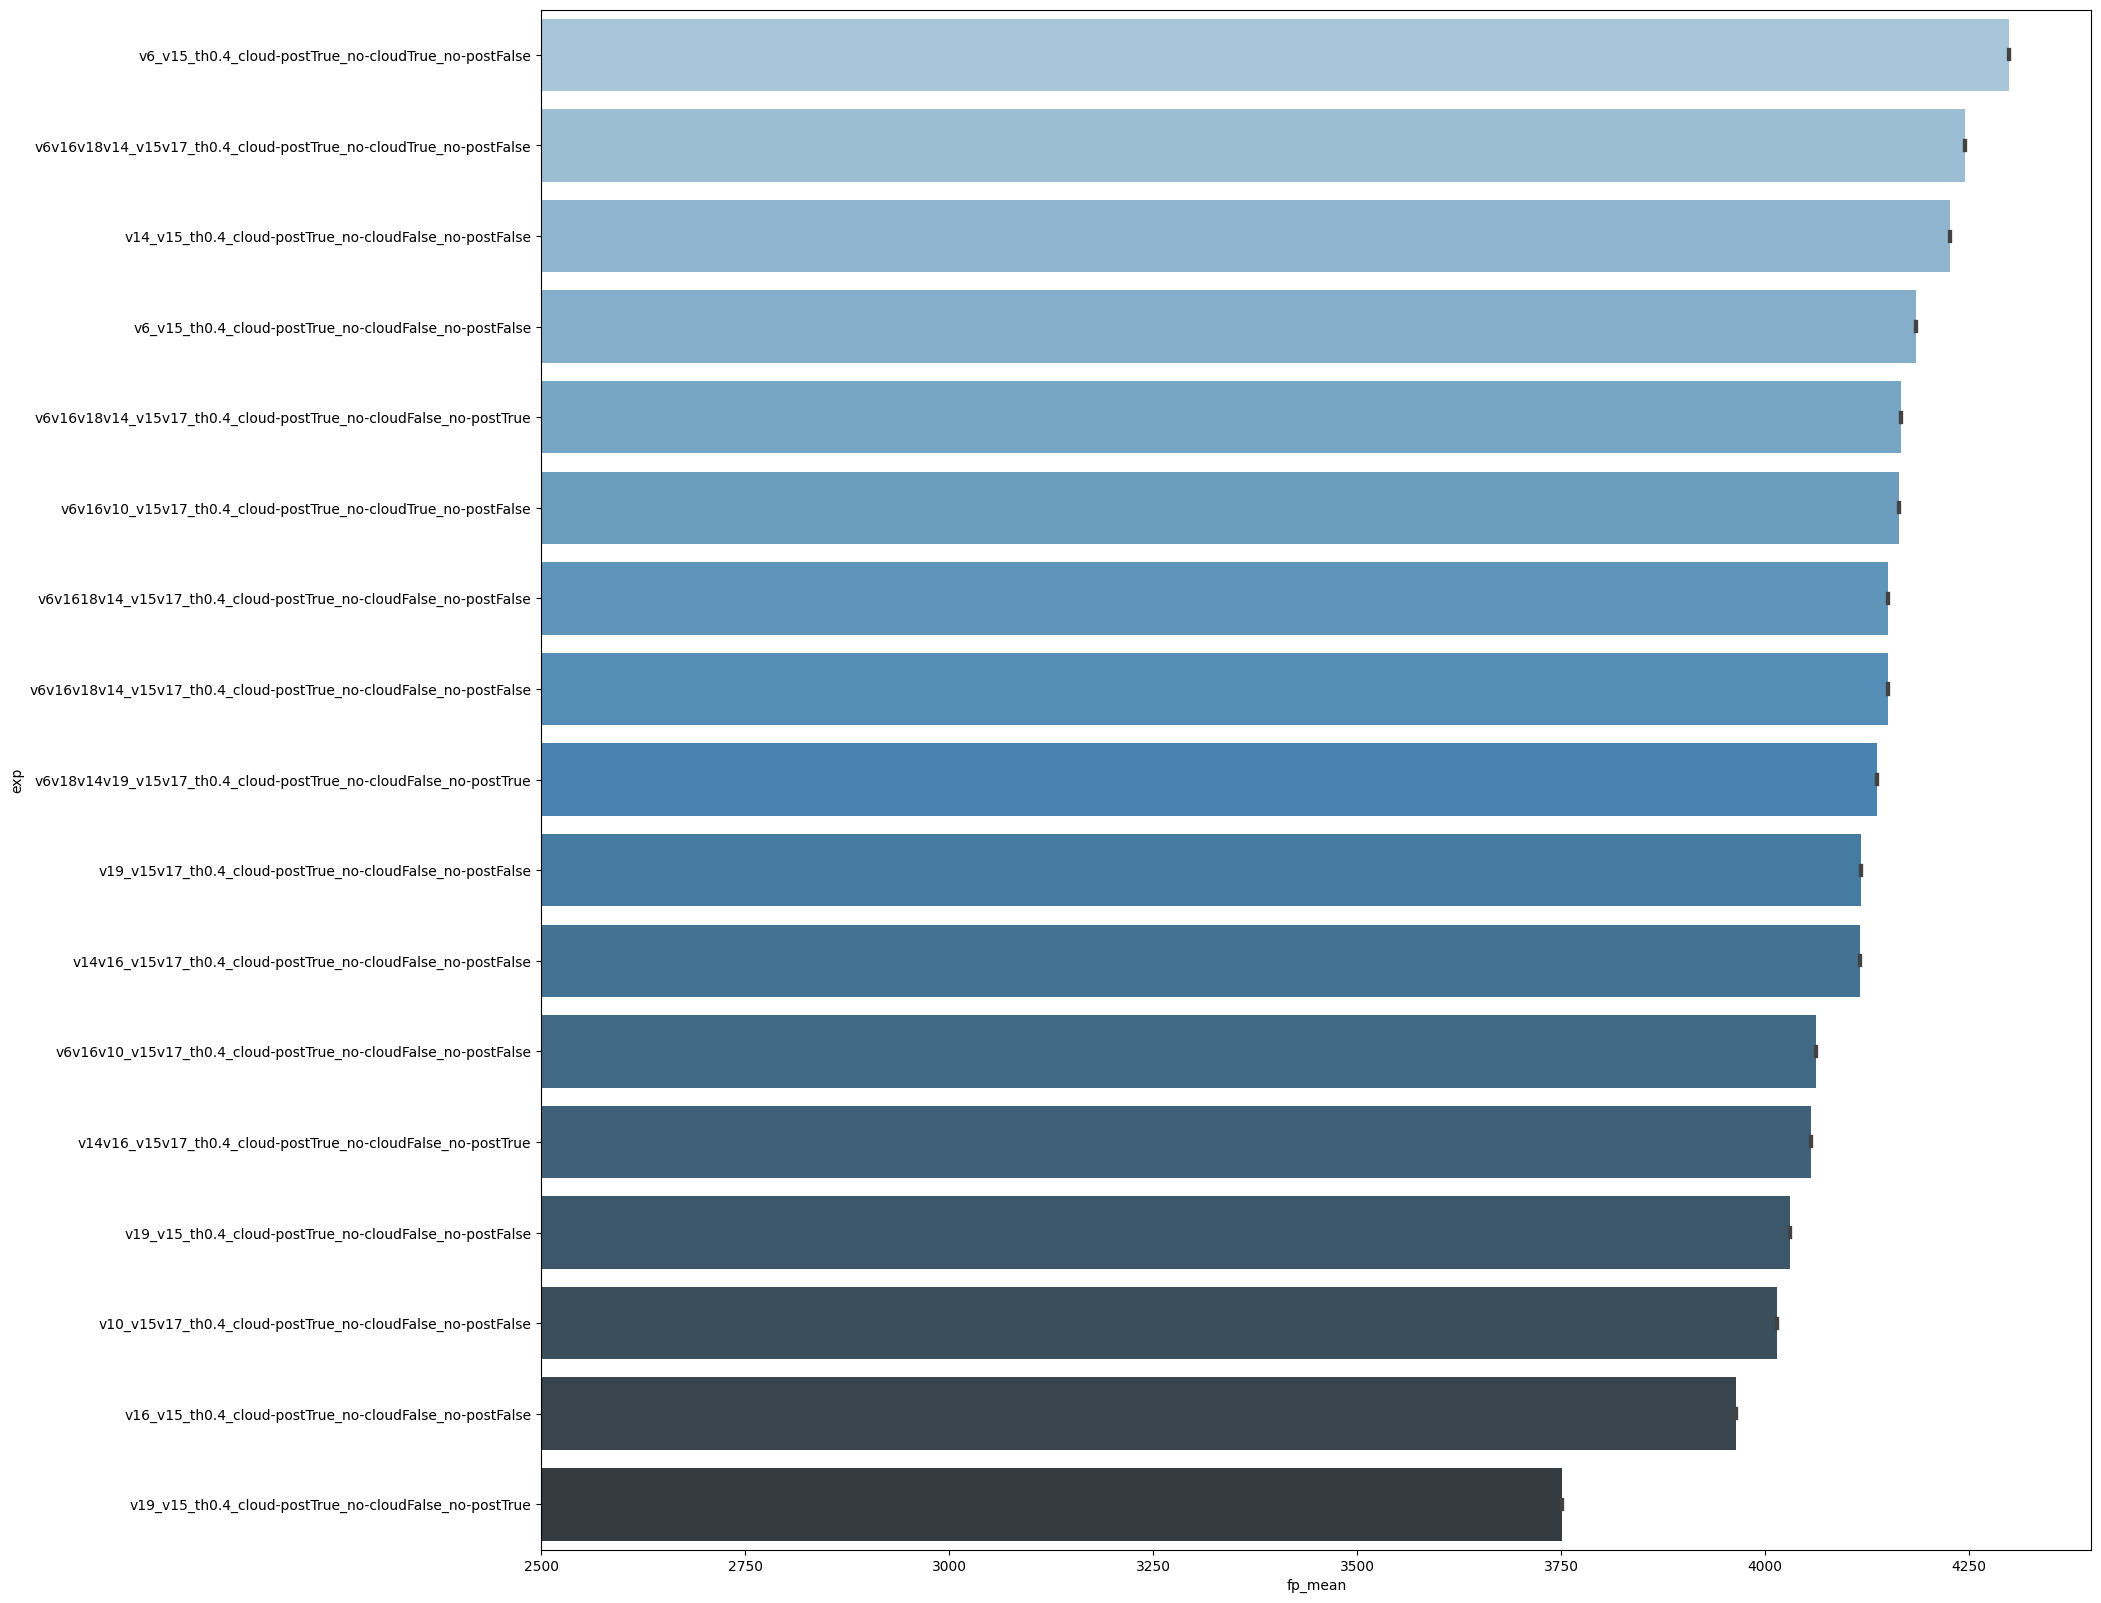

In [6]:
plt.figure(figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(data=df, y="exp", x="fp_mean",
            errwidth=3, capsize=.1, 
            n_boot=1000, palette="Blues_d")
plt.xlim(2500, 4400)
plt.savefig(f'{PATH_OUTPUT}/fp_agg-exp.png')
plt.show();

In [7]:
df['Calfornia_fp'] = df.groupby(['exp', 'Calfornia'])['fp'].transform('mean')

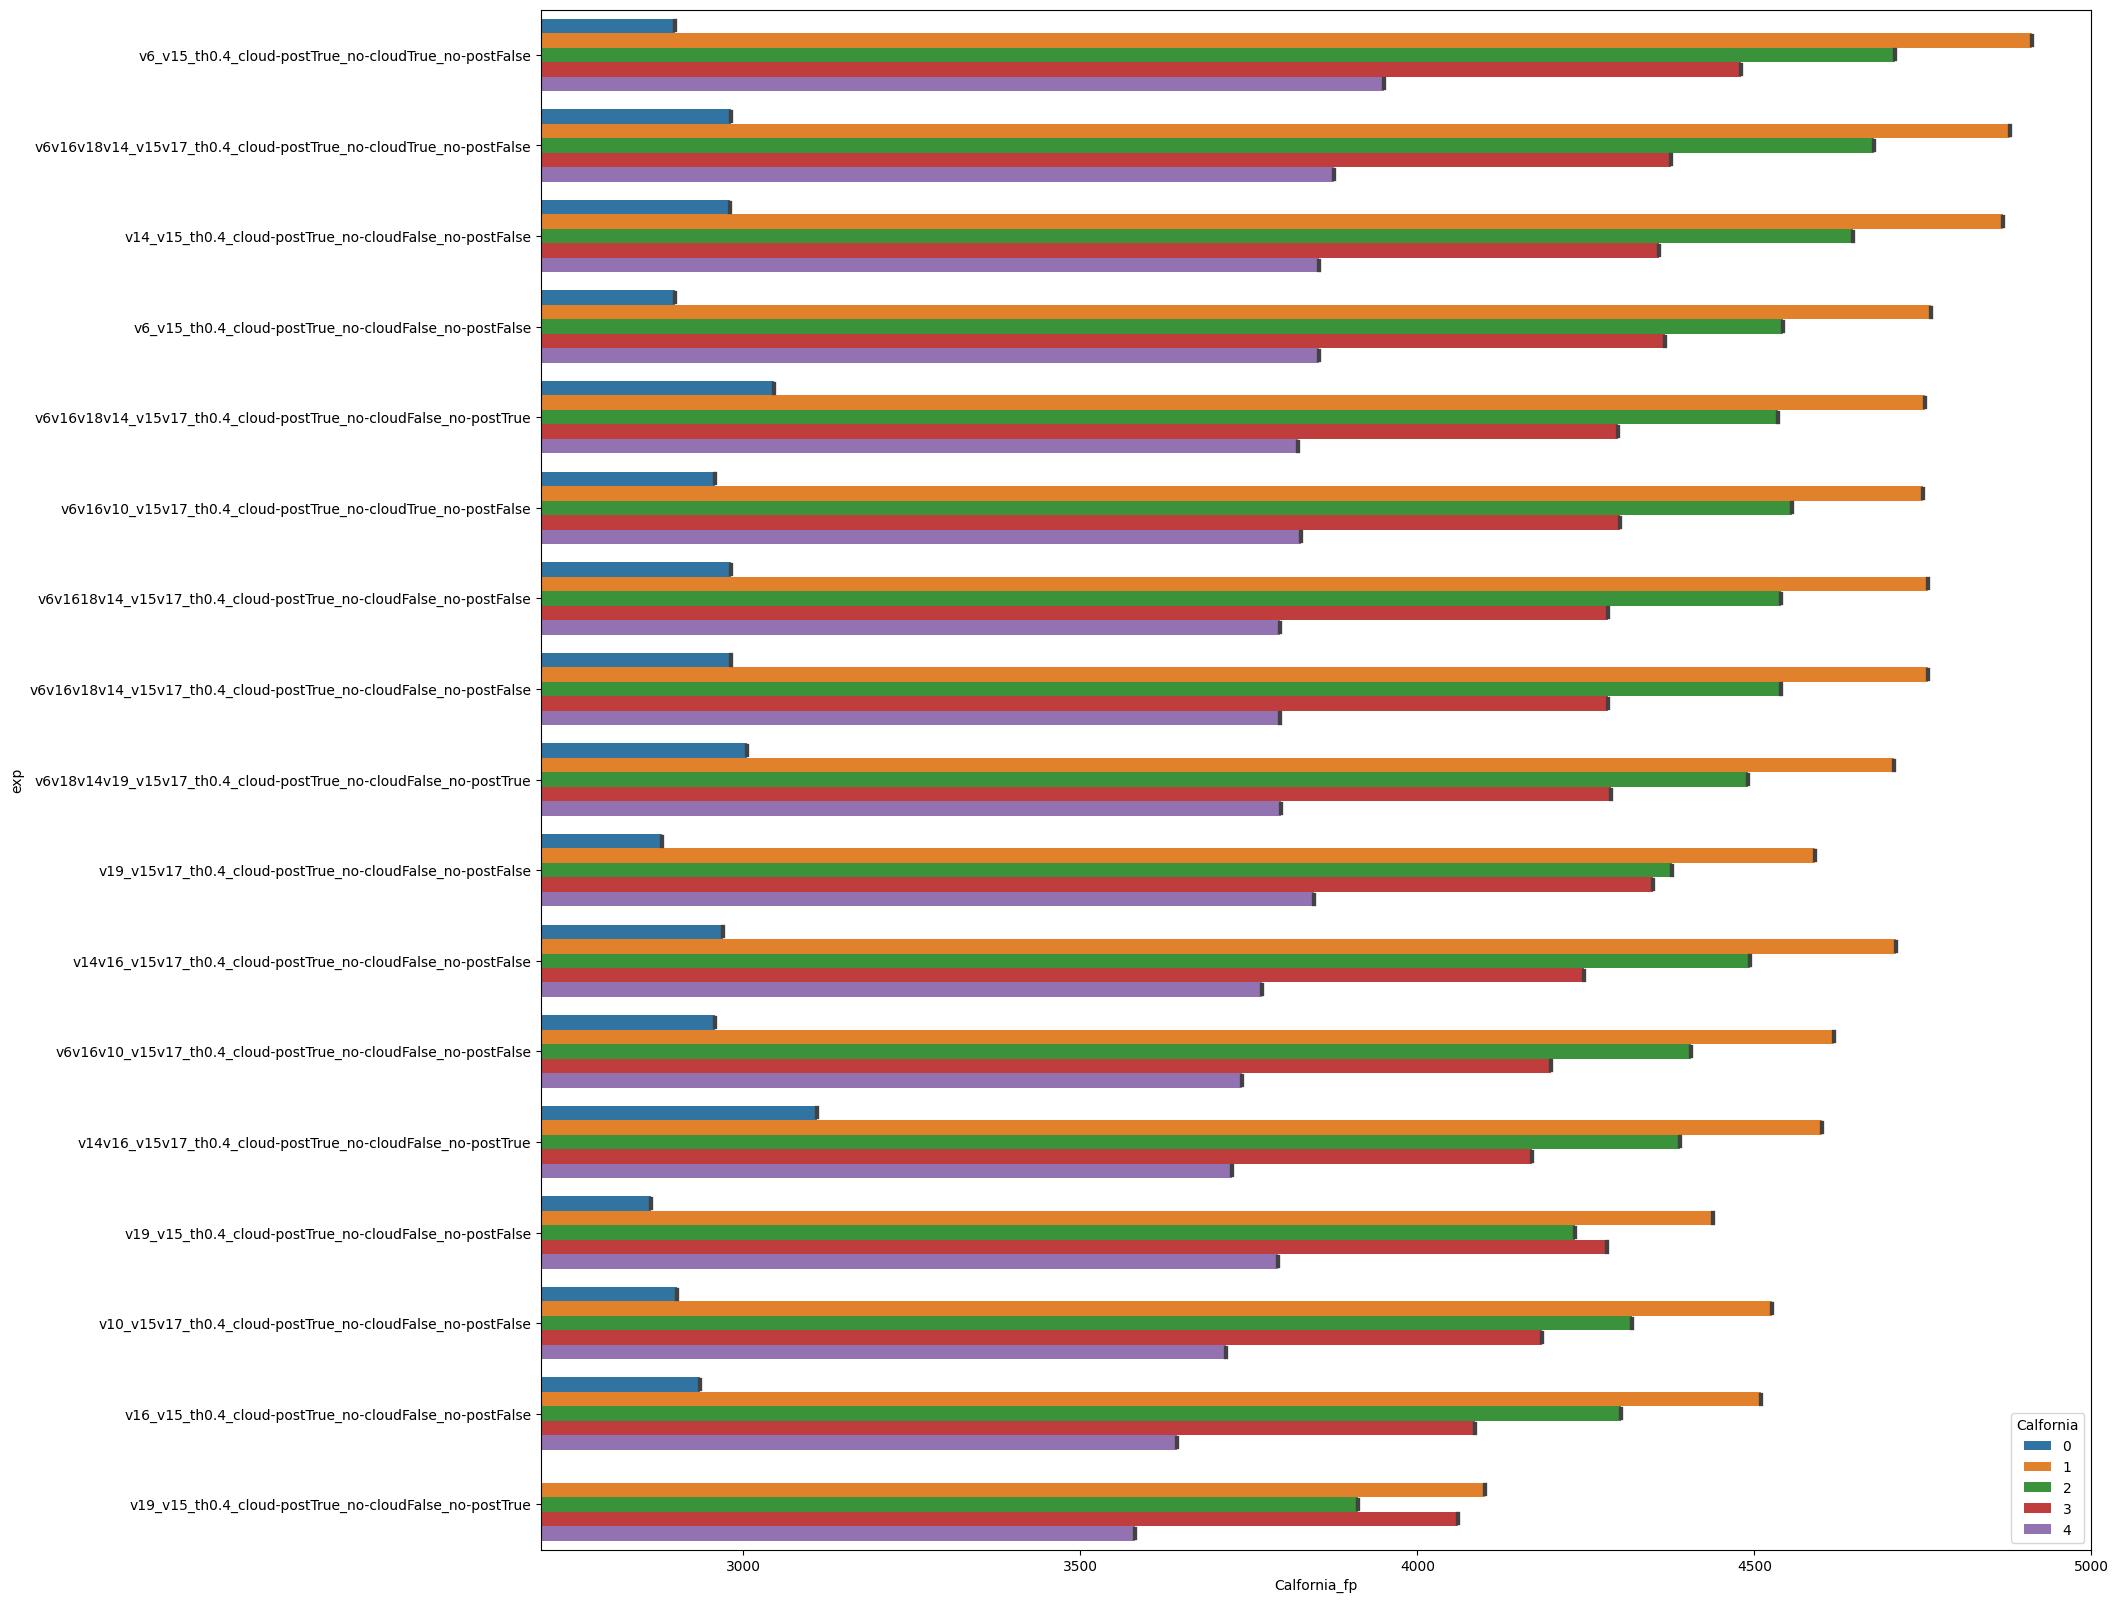

In [8]:
plt.figure(figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(data=df, y="exp", x="Calfornia_fp", 
            hue='Calfornia',
            errwidth=3, capsize=.1,)
plt.xlim(2700, 5000)
plt.savefig(f'{PATH_OUTPUT}/fp_agg-exp_cal.png')
plt.show();

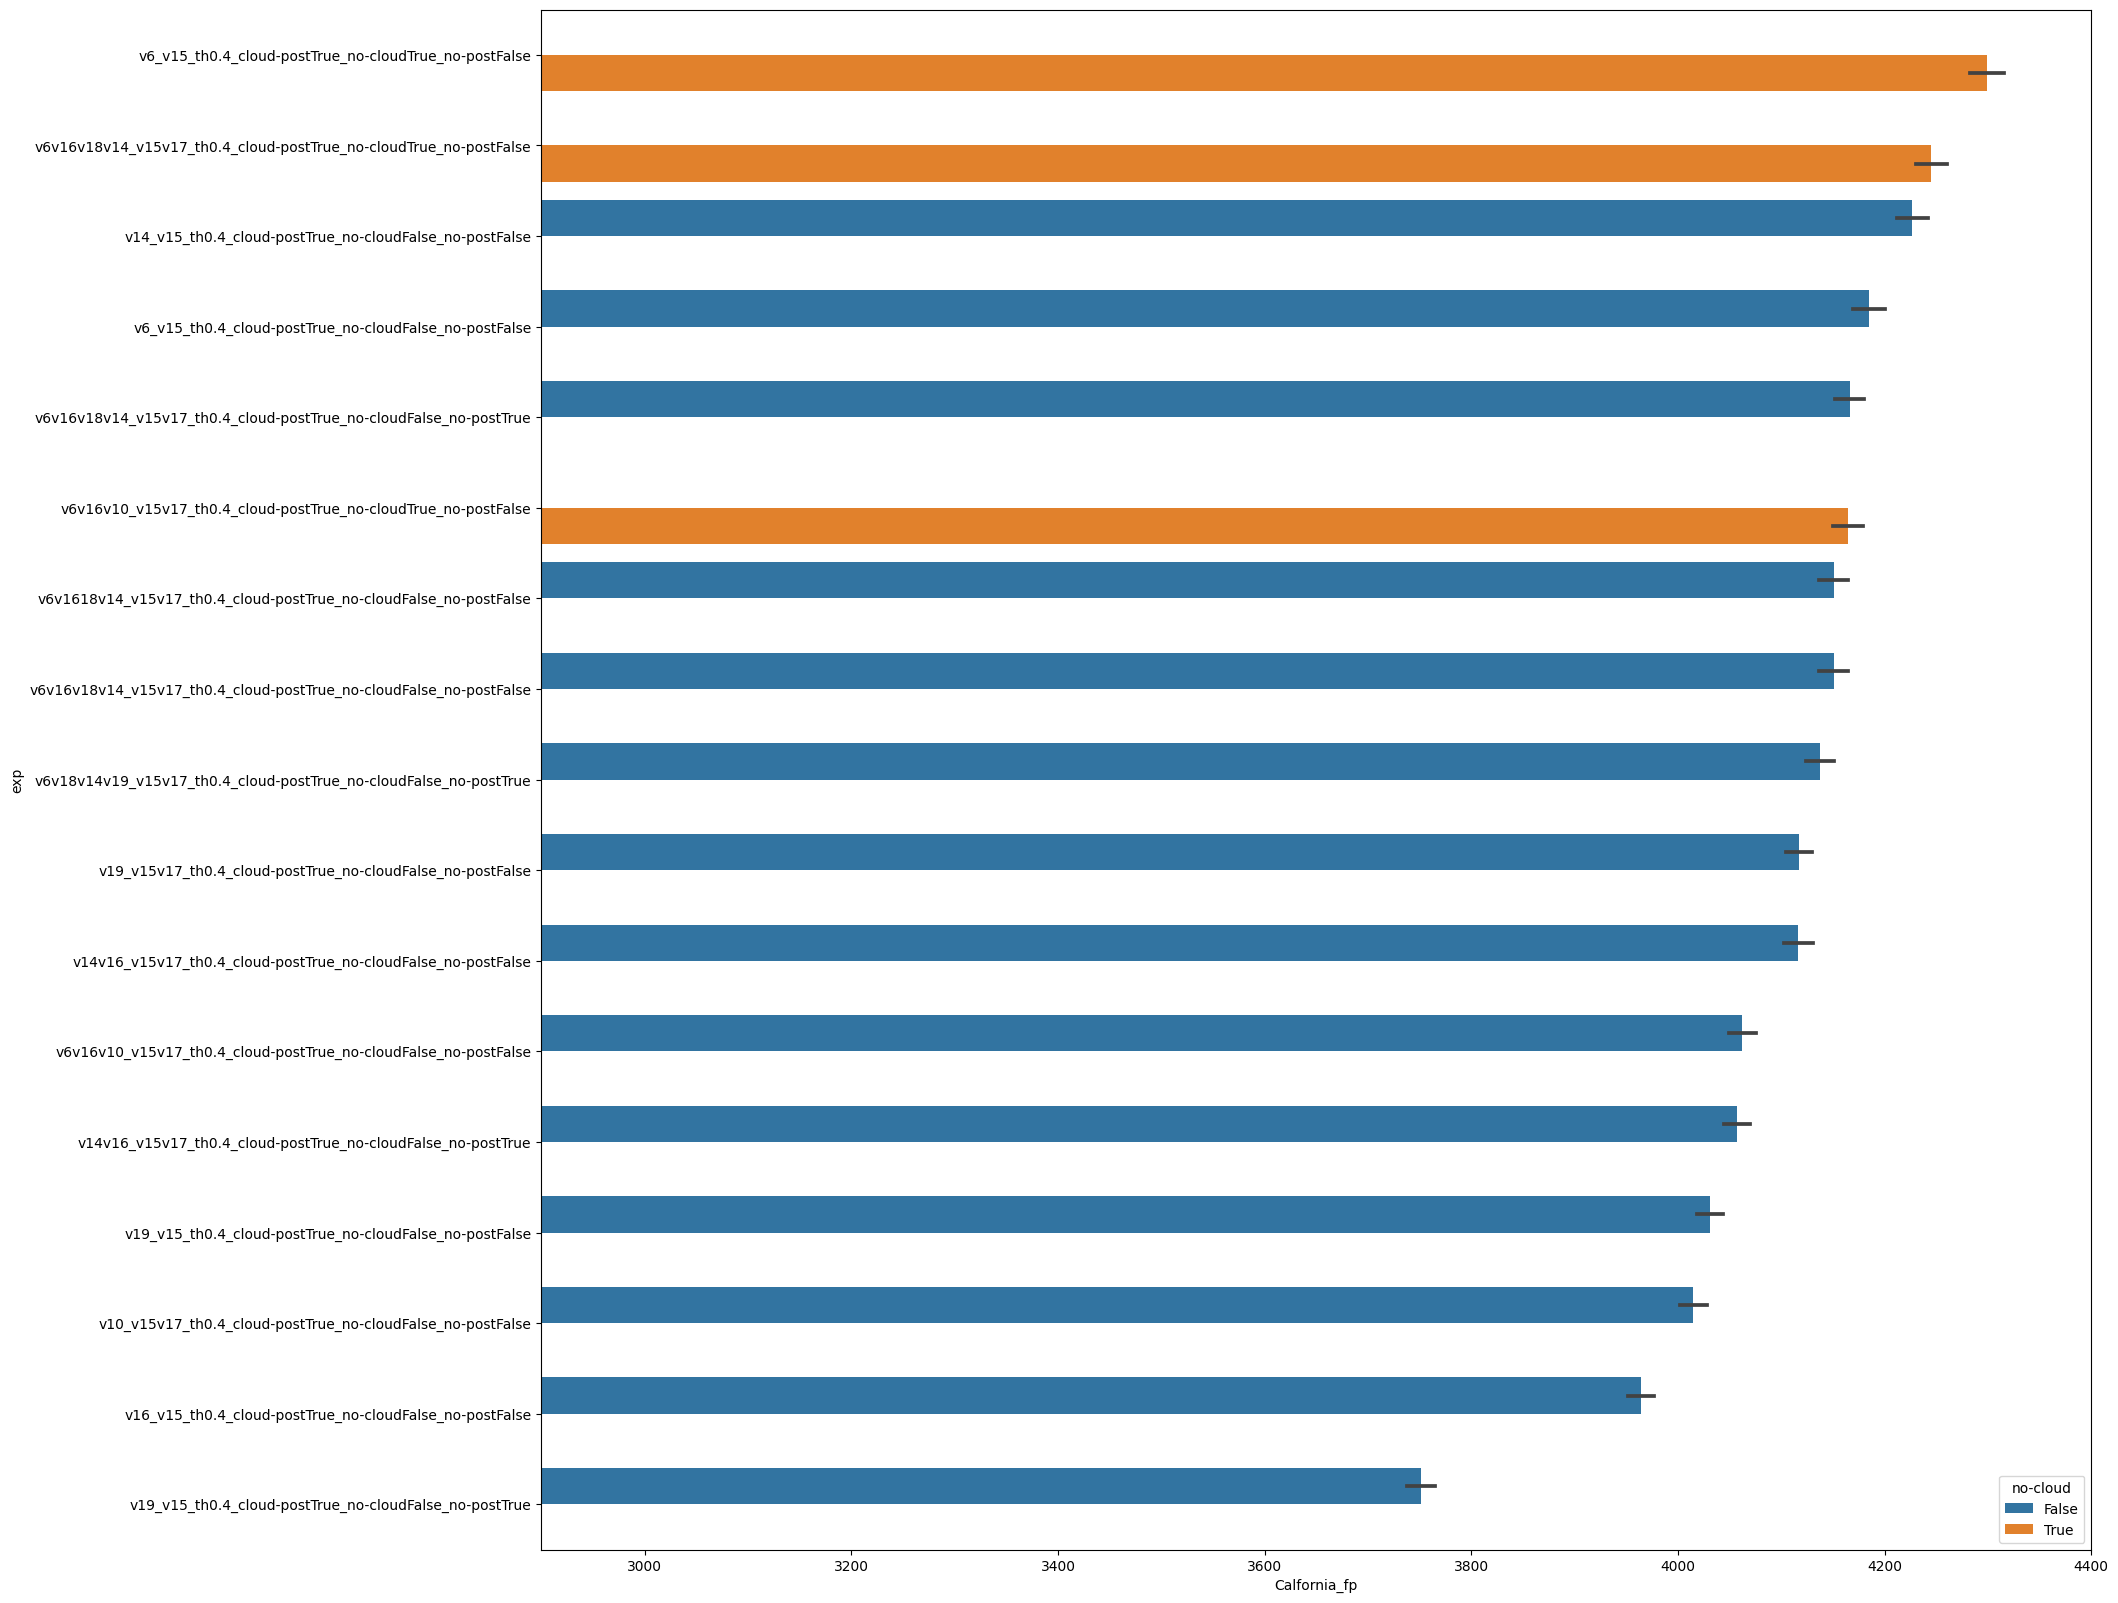

In [9]:
plt.figure(figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(data=df, y="exp", x="Calfornia_fp", 
            hue='no-cloud',
            # errwidth=3, capsize=.1,
            )
plt.xlim(2900, 4400)
plt.savefig(f'{PATH_OUTPUT}/fp_agg-exp_cal_fp_no-cloud.png')
plt.show();

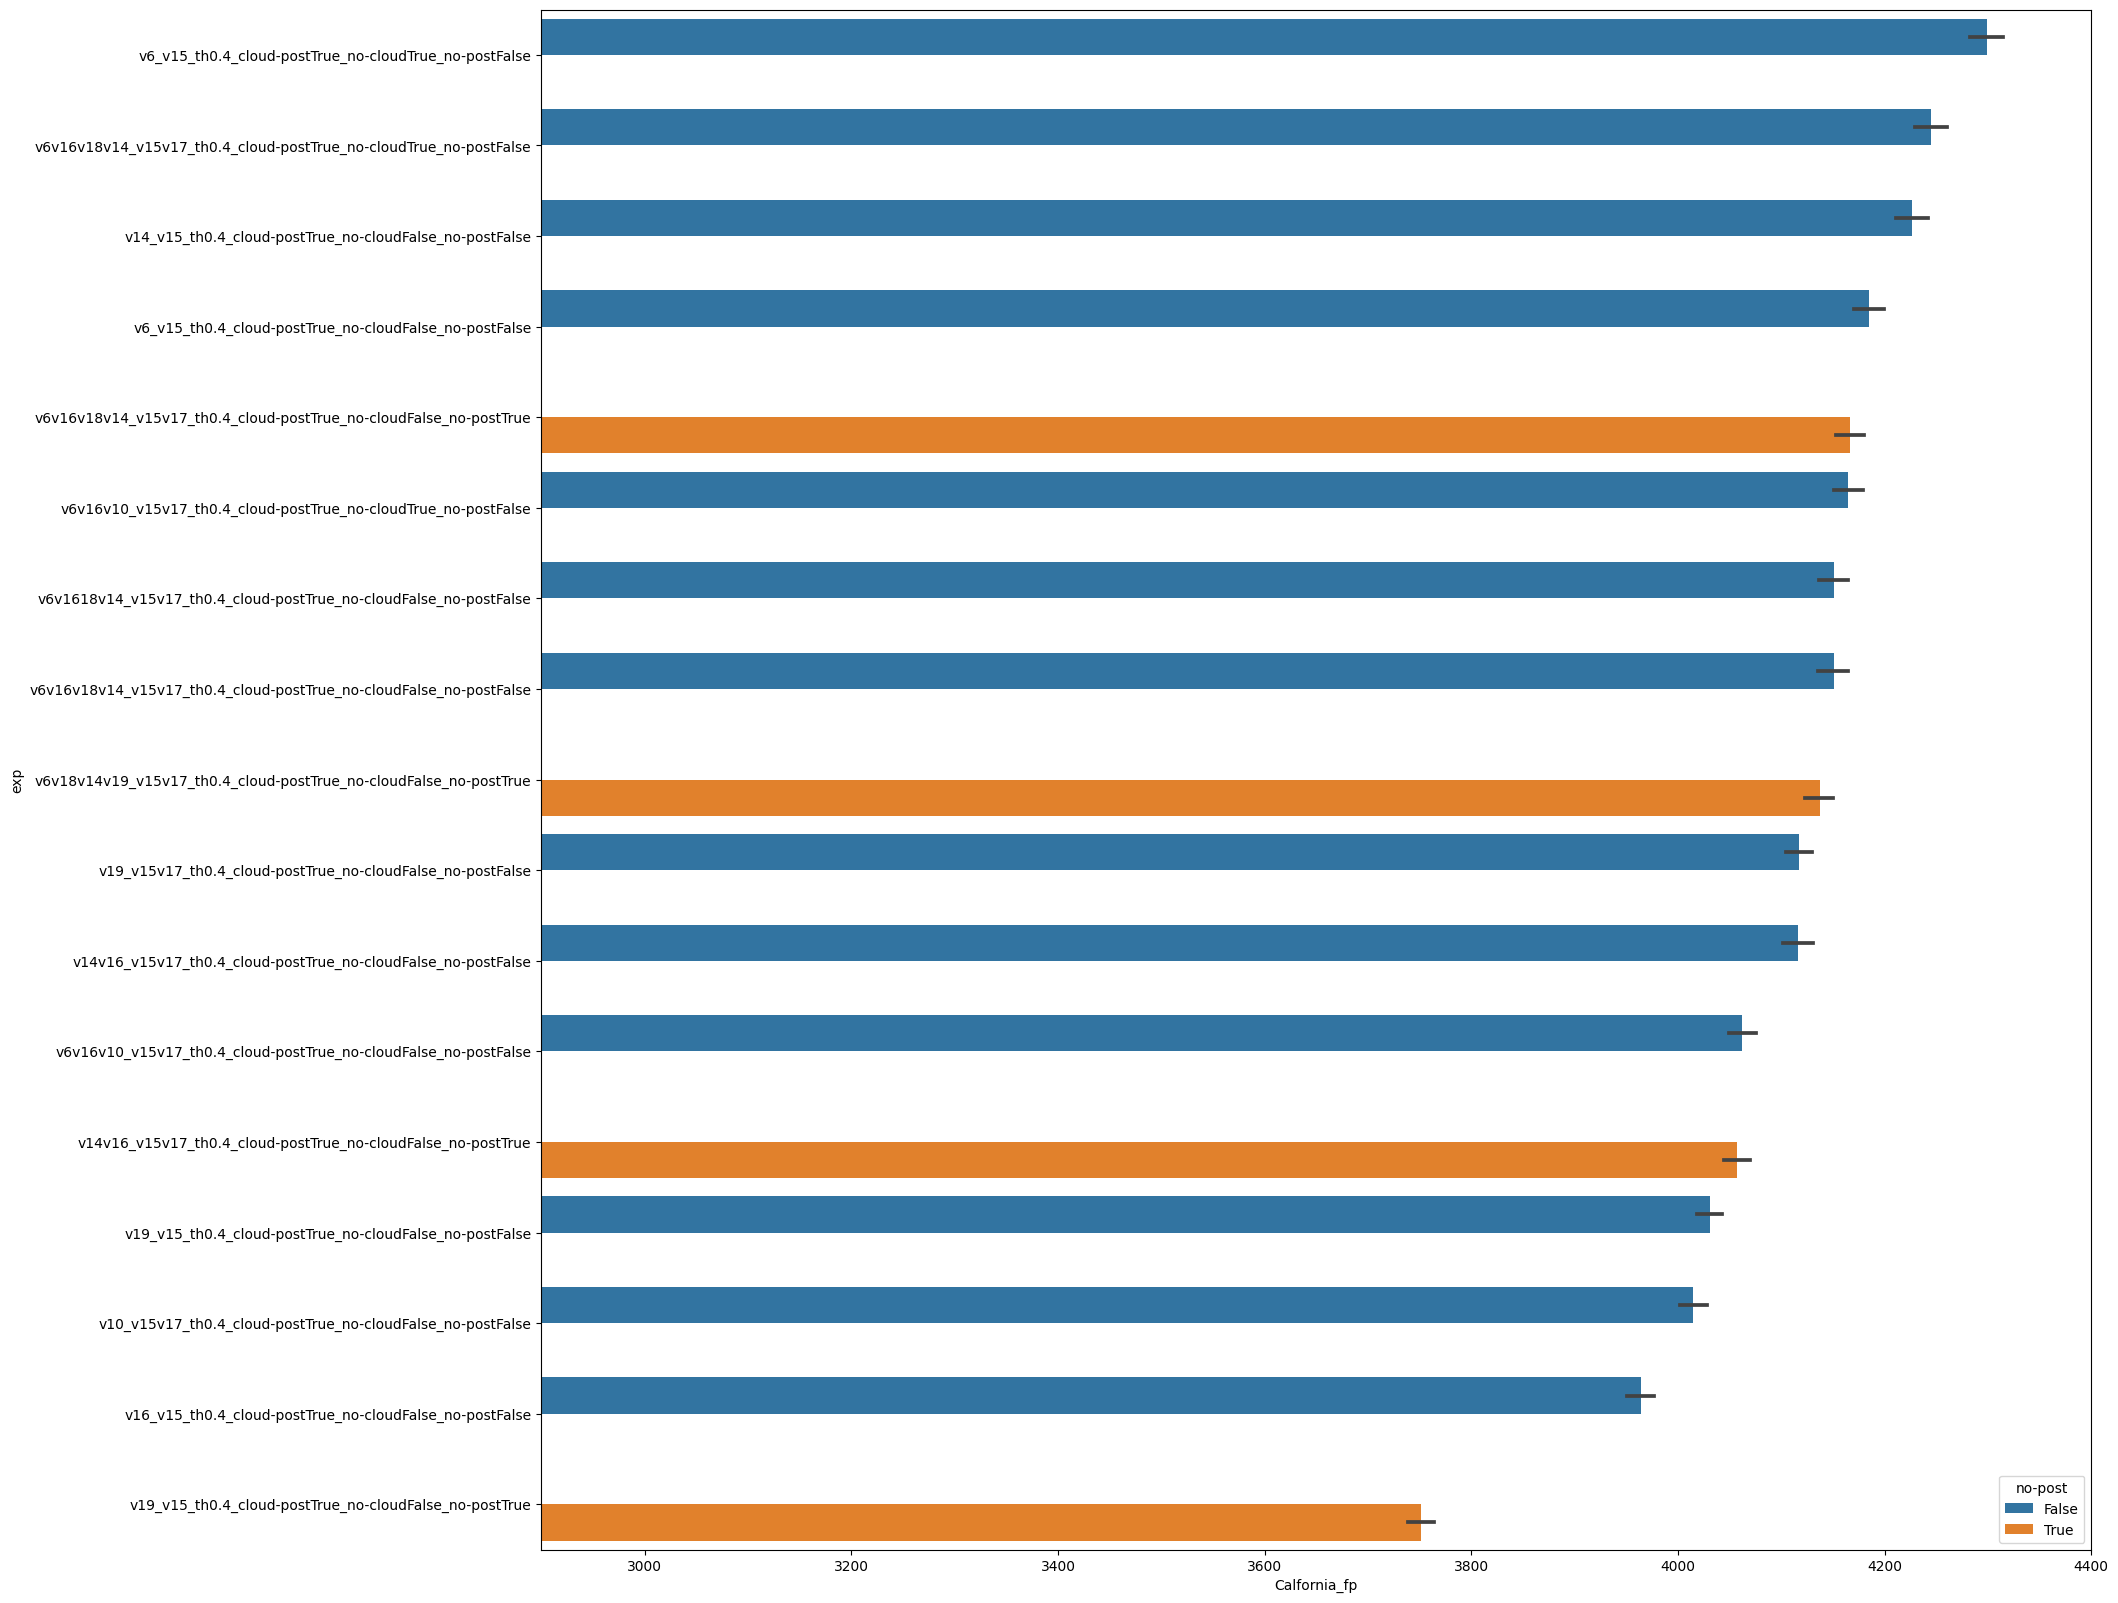

In [10]:
plt.figure(figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(data=df, y="exp", x="Calfornia_fp", 
            hue='no-post',
            # errwidth=3, capsize=.1,
            )
plt.xlim(2900, 4400)
plt.savefig(f'{PATH_OUTPUT}/fp_agg-exp_cal_fp_no-post.png')
plt.show();

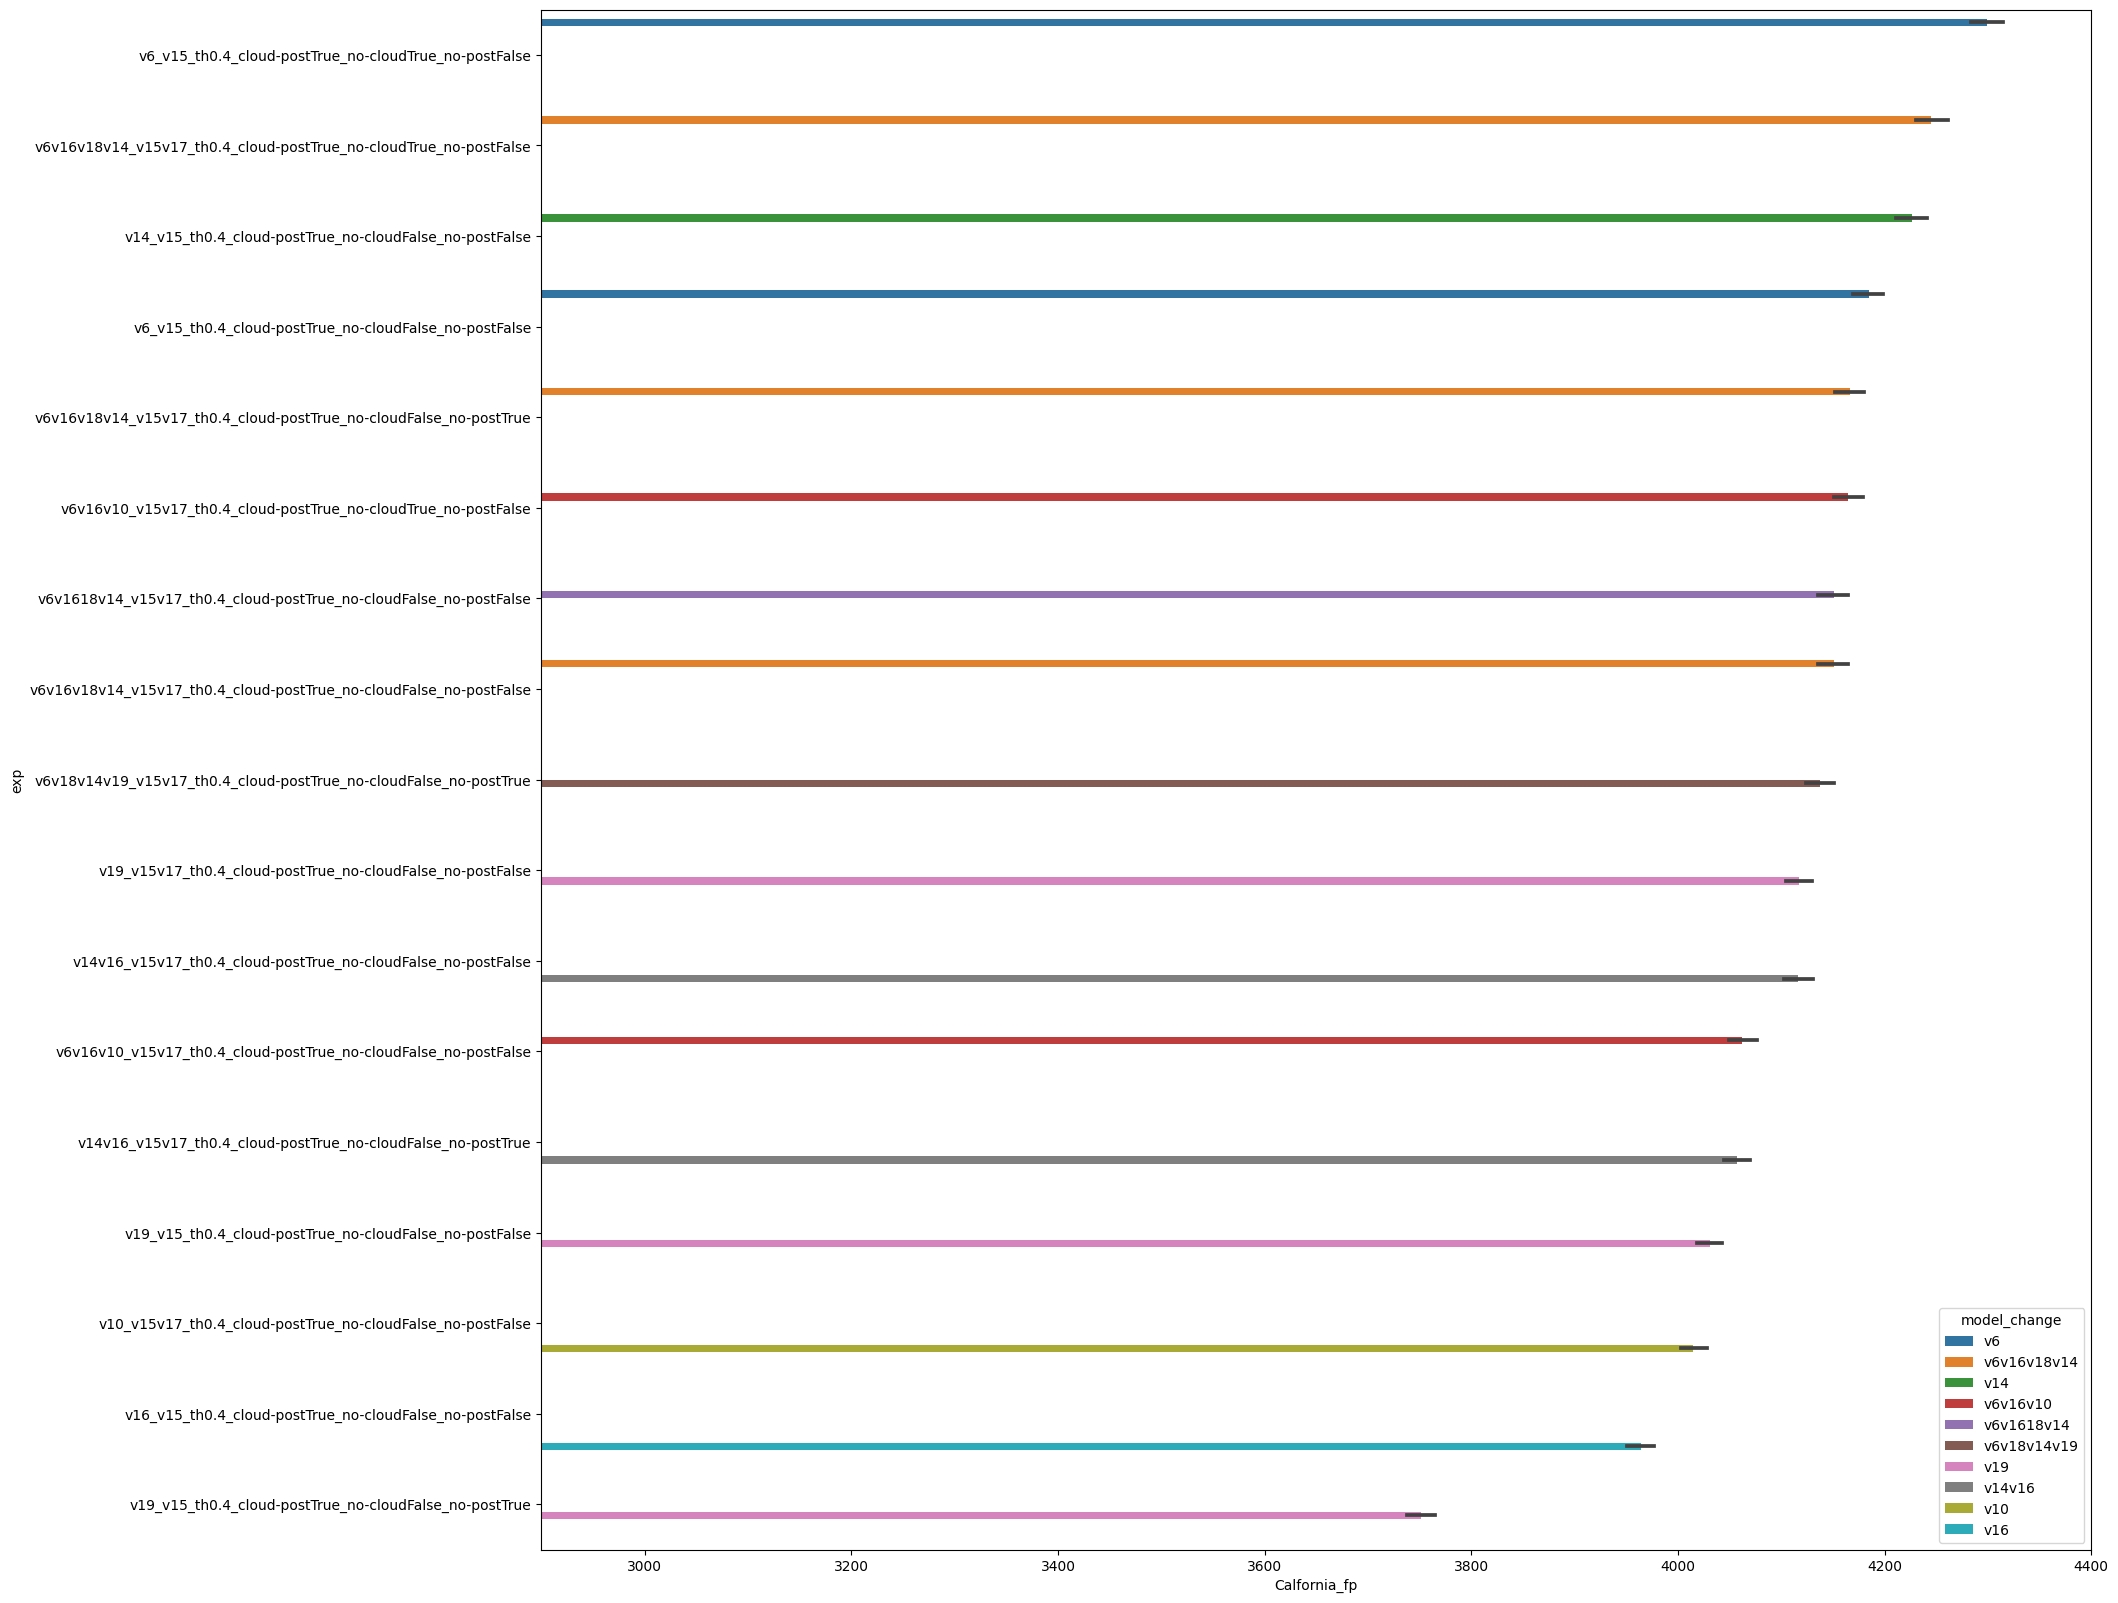

In [11]:
plt.figure(figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(data=df, y="exp", x="Calfornia_fp", 
            hue='model_change',
            # errwidth=3, capsize=.1,
            )
plt.xlim(2900, 4400)
plt.savefig(f'{PATH_OUTPUT}/fp_agg-exp_fp_model_change.png')
plt.show();

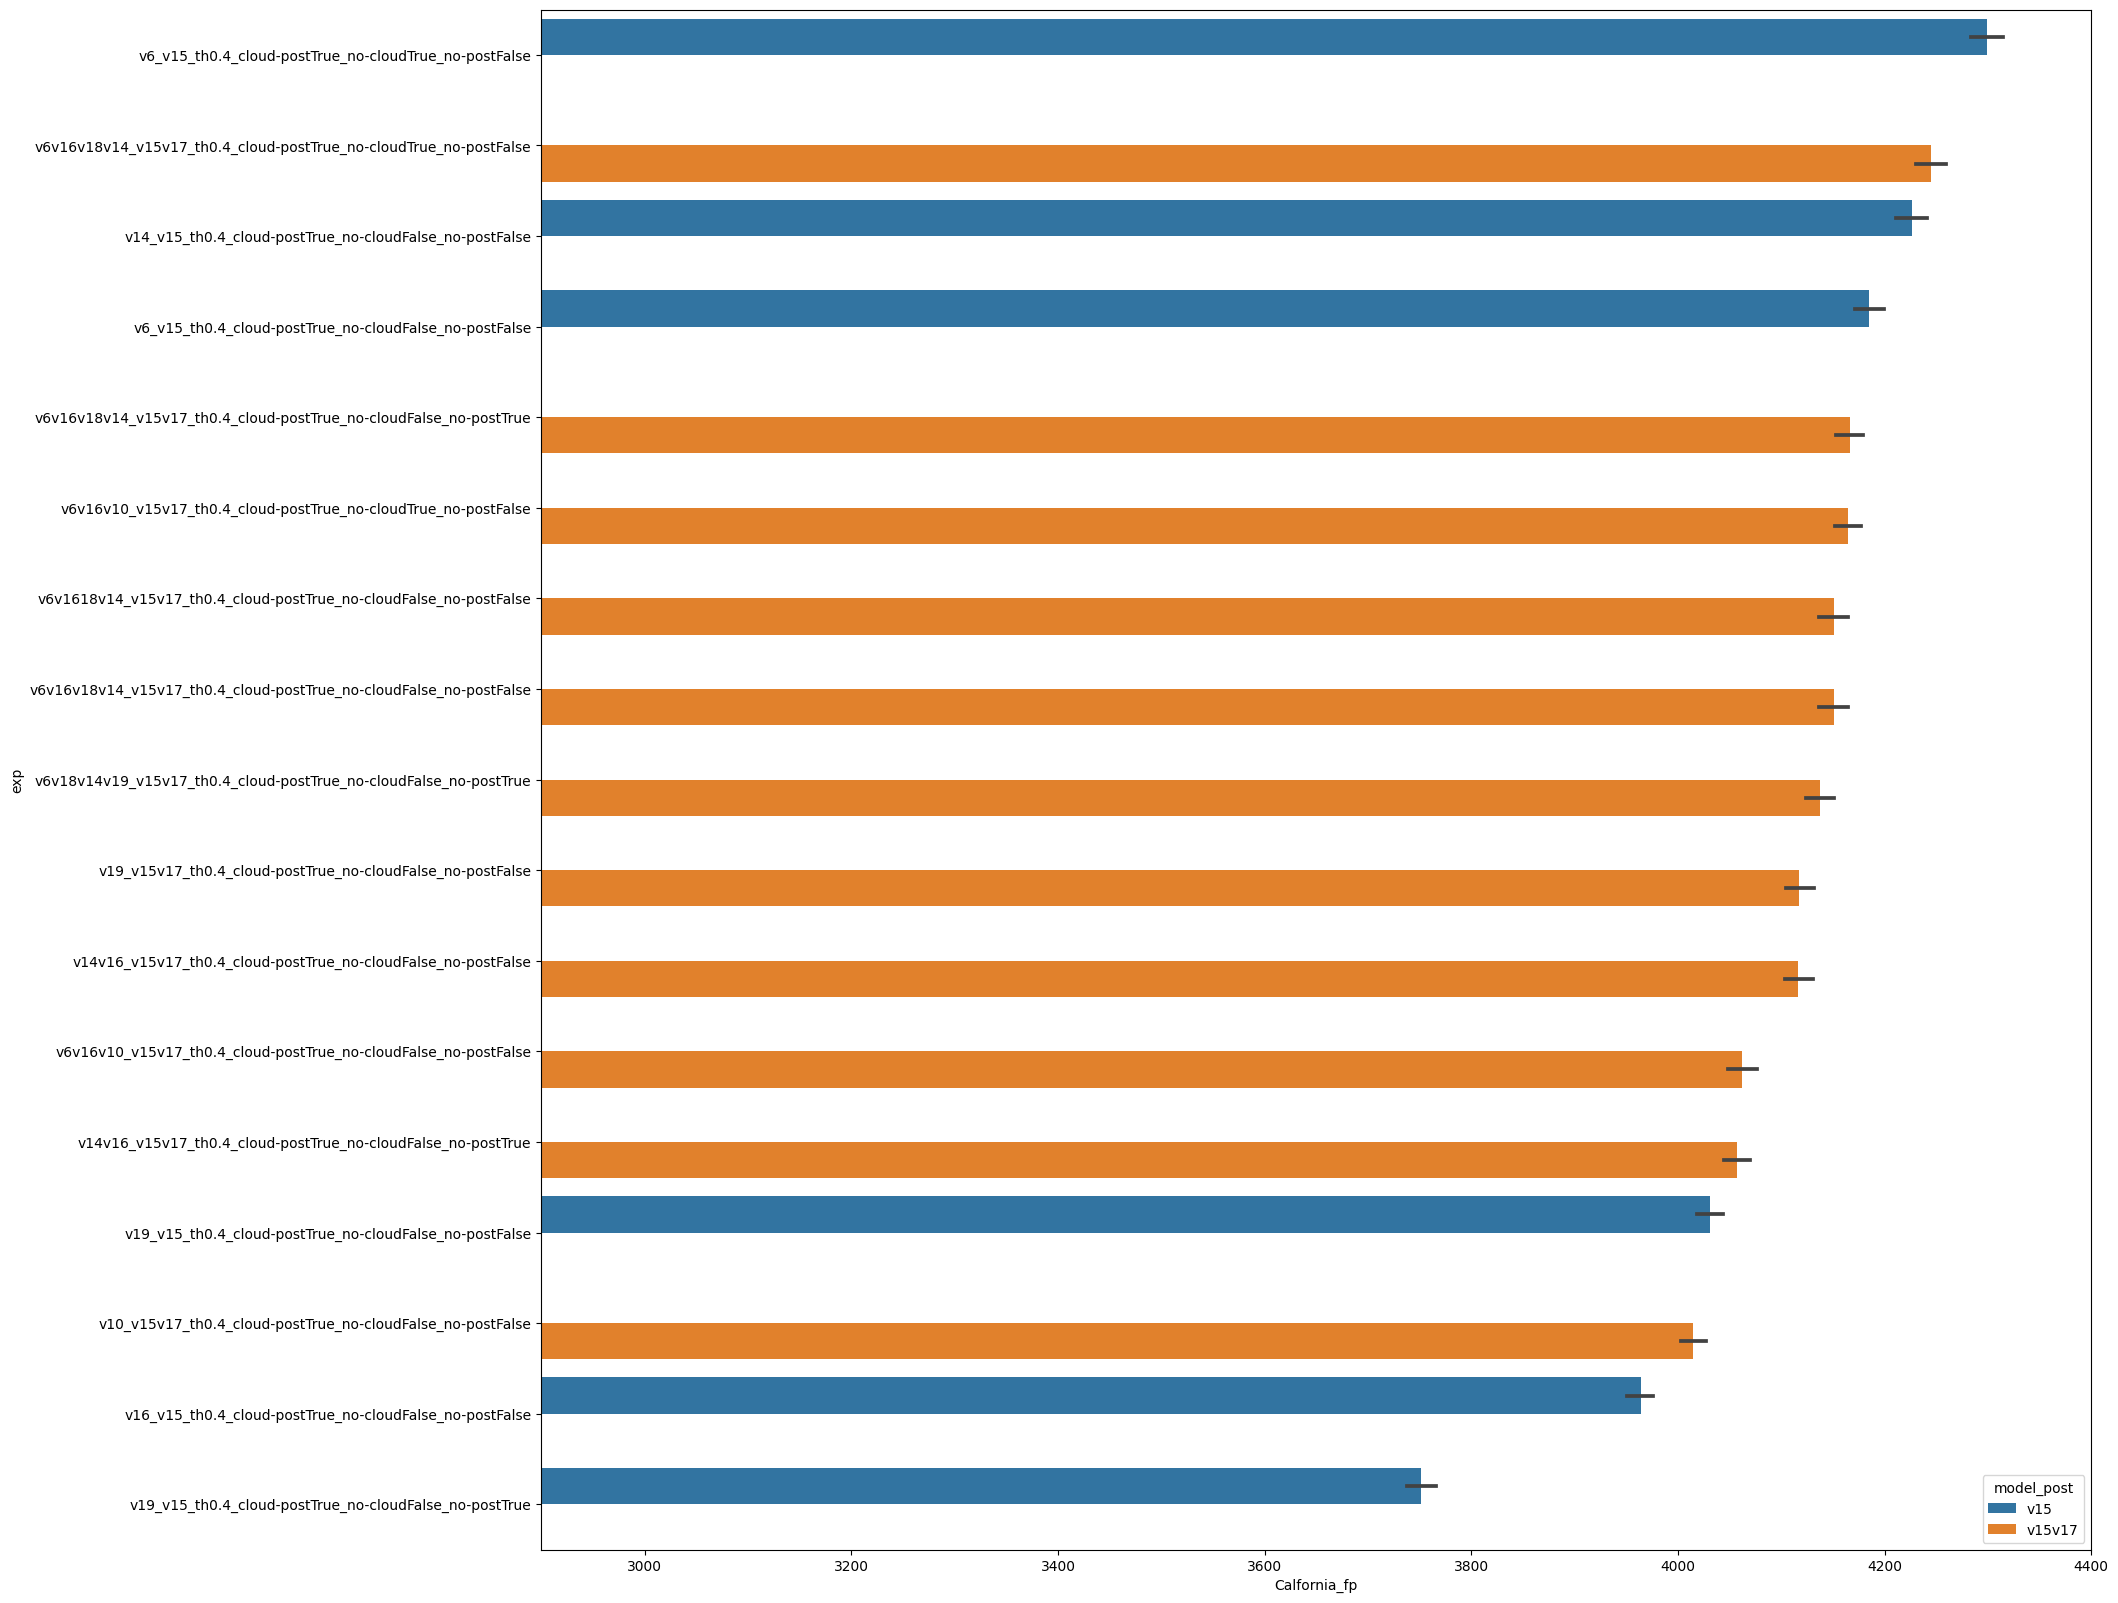

In [12]:
plt.figure(figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(data=df, y="exp", x="Calfornia_fp", 
            hue='model_post',
            # errwidth=3, capsize=.1,
            )
plt.xlim(2900, 4400)
plt.savefig(f'{PATH_OUTPUT}/fp_agg-exp_fp_model_post.png')
plt.show();